In [1]:
!pip install psycopg2 pandas matplotlib seaborn

     ---------------------------------------- 1.2/1.2 MB 709.9 kB/s eta 0:00:00


In [3]:
import psycopg2
import pandas as pd

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="walmart_project",
    user="postgres",
    password="rahuldb",
    host="localhost",
    port="5432"
)

# Load data into a DataFrame
query = "SELECT * FROM sales;"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the data
df.head(20)


C:\Users\rahul\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,...,time,payment,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,product_category
0,329-62-1586,A,Yangon,Normal,Male,Food and beverages,54.67,3,8.2005,172.2105,...,18:00:00,Credit card,164.01,4.761905,8.2005,8.6,Evening,Monday,January,Bad
1,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,...,15:30:00,Ewallet,80.60,4.761905,4.0300,4.4,Afternoon,Monday,March,Bad
2,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,...,11:24:00,Ewallet,430.20,4.761905,21.5100,4.8,Morning,Monday,February,Good
3,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.1970,277.1370,...,10:40:00,Ewallet,263.94,4.761905,13.1970,5.1,Morning,Tuesday,March,Bad
4,273-16-6619,B,Mandalay,Normal,Male,Home and lifestyle,33.20,2,3.3200,69.7200,...,12:20:00,Credit card,66.40,4.761905,3.3200,4.4,Afternoon,Friday,March,Bad
5,636-48-8204,A,Yangon,Normal,Male,Electronic accessories,34.56,5,8.6400,181.4400,...,11:15:00,Ewallet,172.80,4.761905,8.6400,9.9,Morning,Sunday,February,Bad
6,549-59-1358,A,Yangon,Member,Male,Sports and travel,88.63,3,13.2945,279.1845,...,17:36:00,Ewallet,265.89,4.761905,13.2945,6.0,Evening,Saturday,March,Bad
7,227-03-5010,A,Yangon,Member,Female,Home and lifestyle,52.59,8,21.0360,441.7560,...,19:20:00,Credit card,420.72,4.761905,21.0360,8.5,Evening,Friday,March,Good
8,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,...,15:31:00,Cash,33.52,4.761905,1.6760,6.7,Afternoon,Friday,February,Bad
9,189-17-4241,A,Yangon,Normal,Female,Fashion accessories,87.67,2,8.7670,184.1070,...,12:17:00,Credit card,175.34,4.761905,8.7670,7.7,Afternoon,Sunday,March,Bad


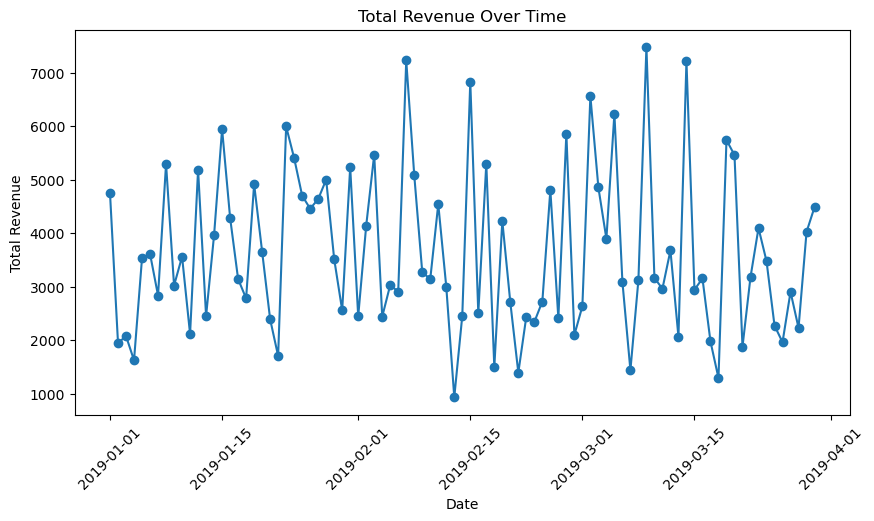

In [4]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby('date')['total'].sum()

plt.figure(figsize=(10,5))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Over Time")
plt.xticks(rotation=45)
plt.show()


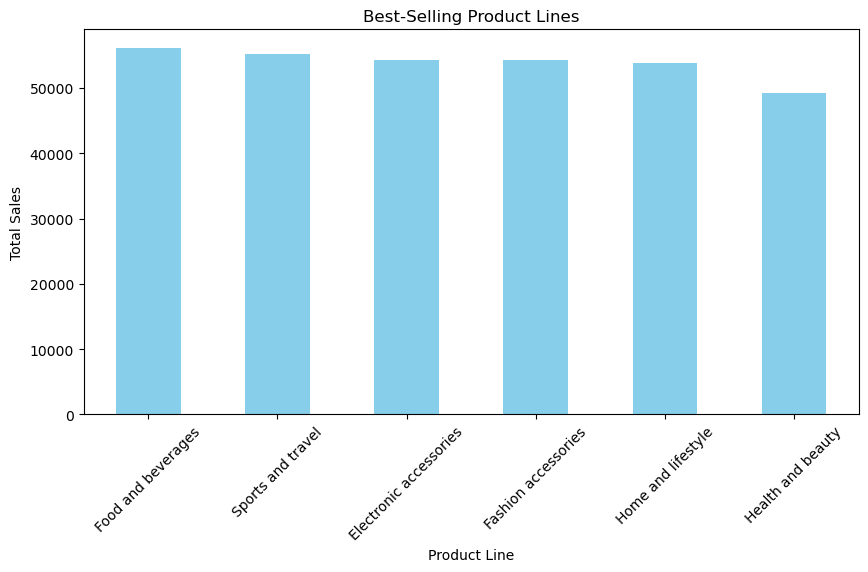

In [5]:
df_grouped = df.groupby('product_line')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
df_grouped.plot(kind='bar', color='skyblue')
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.title("Best-Selling Product Lines")
plt.xticks(rotation=45)
plt.show()


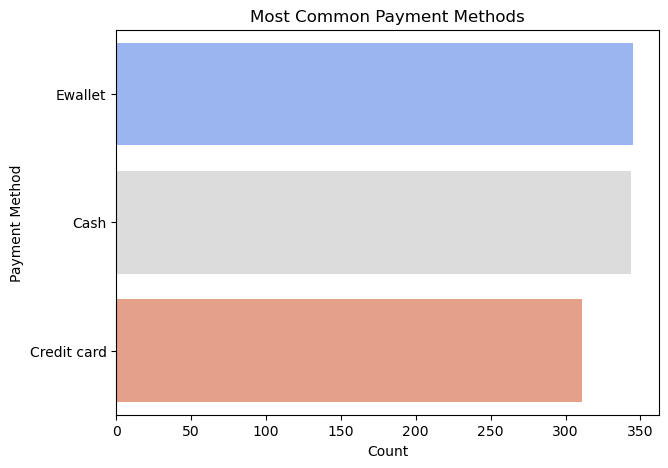

In [6]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(y=df['payment'], order=df['payment'].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.title("Most Common Payment Methods")
plt.show()
